In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # opcional para visuales
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy.stats as stats

RND = 42
np.random.seed(RND)

1. Generar un conjunto de datos de tamaño 40 que provengan de una distribucion U(2, 10). A partir de 300 muestras bootstrap, estimar la densidad de:
a) la mediana del conjunto de datos.
b) la distancia intercuartil del conjunto de datos. (IQR)
Para ello, hacer histogramas de probabilidad. Ejecutar varias veces el mismo codigo para observar como varıan los histogramas. Explorar generando otros conjuntos de datos.

Generamos la muestra de 40 observaciones

In [25]:
n = 40
B = 1000
x = np.random.uniform(2,10,n) #Distribución pedida U(2, 10) para 40 obs
#U(2, 10) los num generados entre 2 y 10

In [8]:
#Generamos función que arme el rango interquartil
def iqr(muestra):
    return np.percentile(muestra,75) - np.percentile(muestra,25)

In [ ]:
boot_media=[]
boot_iqr=[]

for i in range(B):
    #Como vamos a trabajar con un vector uni, implementamos random.choice
    muestra = np.random.choice(x, size=n, replace=True)
    boot_media.append(np.median(muestra))
    boot_iqr.append(iqr(muestra))

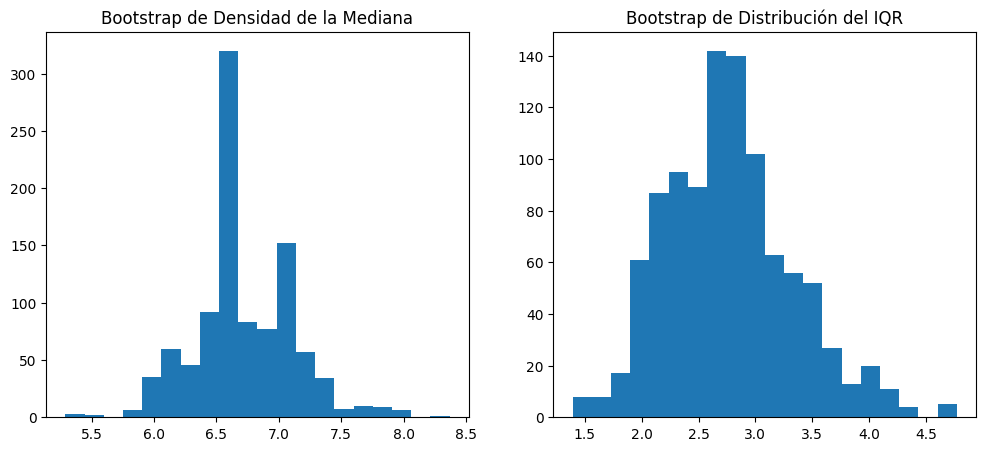

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(boot_media, bins = 20)
plt.title("Bootstrap de Densidad de la Mediana")
plt.subplot(1,2,2)
plt.hist(boot_iqr, bins= 20)
plt.title("Bootstrap de Distribución del IQR")
plt.show()

Obervamos que la tendencia a la mediana es muy efectiva hacia el valor 6.5 y por otro lado, el iqr denota una fuerte densidad entre el valor 3 y 3.5, es decir que nuestro rango interquartilico entre el Q3(75) y Q1(25) está distanciado por entre 3 y 3.5 unidades.

Ejemplo de rango:(7,10) 

In [ ]:
#Buscamos la media general

media_gnral = 0

for i in boot_media:
    media_gnral += i
    
media_gnral = media_gnral/1000

print(media_gnral)


6.717410065444132


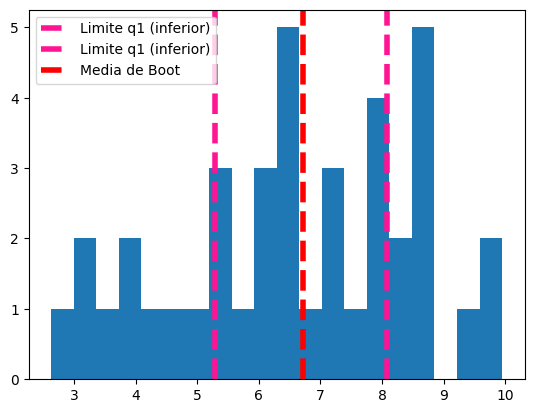

In [49]:

q1 = np.percentile(x,25)
q3 = np.percentile(x,75)
plt.hist(x, bins=20)
plt.axvline(q1, 
            linestyle = "--", 
            lw = 4, 
            color="deeppink",
            label= "Limite q1 (inferior)")
plt.axvline(q3, 
            linestyle = "--", 
            lw = 4, 
            color="deeppink",
            label= "Limite q1 (inferior)")
plt.axvline(media_gnral, 
            linestyle = "--", 
            lw = 4, 
            color="red",
            label= "Media de Boot")
plt.legend()